In [1]:
# importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("drug200.csv")  # importing the data

In [3]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Data preprocessing 

In [5]:
# object creation of class LabelEncoder
le = LabelEncoder()

# LabelEncoding the columns
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])
data['Drug'] = le.fit_transform(data['Drug'])

In [6]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


### Splitting Dependent and Independent Variables 

In [7]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]  # IV

In [9]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [10]:
y = data['Drug']  # DV

In [11]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int32

### Training the Decision Tree Model 

In [12]:
# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print("x_train shape -", x_train.shape)
print("x_test shape - ", x_test.shape)

# training the model
clf_tree =  DecisionTreeClassifier(criterion="entropy")
clf_tree.fit(x_train,y_train)
y_pred = clf_tree.predict(x_test)
print("Accuracy of Decision Tree Model is -", accuracy_score(y_pred,y_test))

x_train shape - (160, 5)
x_test shape -  (40, 5)
Accuracy of Decision Tree Model is - 1.0


### Prediciting the drug for unknown values 

In [13]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [14]:
prediction = clf_tree.predict([[25,0,1,0,10.114]])
print("Predicited Label encoded drug value is -", prediction)

# inverse transform the label to get the original drug name
predicted_label = prediction
predicted_drug = le.inverse_transform([predicted_label])
print("Predicted name of Drug is -", predicted_drug)

Predicited Label encoded drug value is - [2]
Predicted name of Drug is - ['drugC']


C:\Users\argad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\argad\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plotting DecisionTree 

[Text(0.625, 0.9, 'x[4] <= 14.899\nentropy = 1.978\nsamples = 160\nvalue = [18, 15, 12, 42, 73]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.809\nsamples = 87\nvalue = [18, 15, 12, 42, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.994\nsamples = 33\nvalue = [18, 15, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.764\nsamples = 54\nvalue = [0, 0, 12, 42, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 24\nvalue = [0, 0, 12, 12, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 0, 30, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 73\nvalue = [0, 0, 0, 0, 73]')]

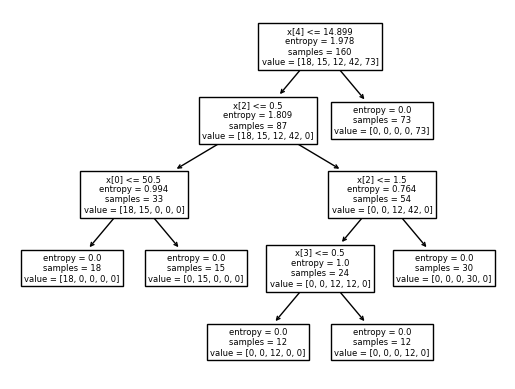

In [15]:
tree.plot_tree(clf_tree)

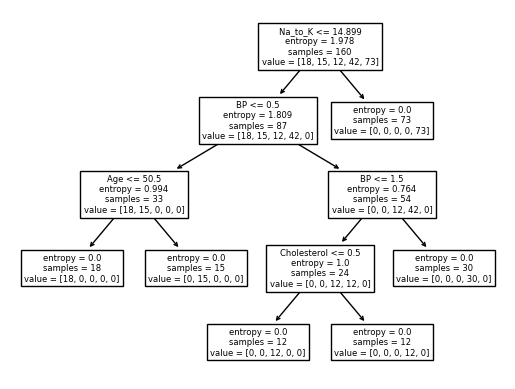

In [16]:
# giving the column names to the nodes of the tree's branch

columnNames = X.columns
tree.plot_tree(clf_tree, feature_names=columnNames)
plt.show()